In [13]:
%matplotlib inline
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

In [14]:
# runtime usr sys idl wai hiq siq used buff cach free recv send read writ memheap memdirect
data = np.load('experiments.npz')
tpchq10, kmeans, cc = data['tpchq10'], data['kmeans'], data['cc']
# tpchq3 = data['tpchq3']

In [9]:
def plot_stats(data):
    
    scale_step_size = 4
    
    x = scale_step_size*(np.arange(data.shape[0])+1)
    
    # plot runtime
    fig = plt.figure(figsize=(7,5))
    plt.plot(x, data[:,0]/1000/60, 'o-')
    plt.xticks(x)
    plt.xlabel('# Nodes')
    plt.ylabel('Runtime [m]')
    plt.xlim(xmin=scale_step_size)
    plt.ylim(0,np.amax(data[:,0]/1000/60))
    runtime_fig = plt.gcf()
    
    # also draw a line for optimal strong scaling
    optimal_y_vals = map(lambda x: float(scale_step_size)/x, x)
    plt_twin = plt.twinx()
    plt_twin.plot(x, optimal_y_vals, 'r-o')
    plt_twin.set_ylabel('"Strong Scaling Ideallinie" (Initiale / Aktuelle Allokation)', color='r')
    
    fig = plt.figure(figsize=(11,6))
    
    # plot cpu usage
    ax1 = fig.add_subplot(221)
    ax1.set_xticks(x)
    ax1.plot(x, ((data[:,1]+data[:,2])/100.), 'b-o')
    ax1.set_ylabel('CPU (usr + sys)', color='b')
    ax1.set_ylim(0, 1)
   
    ax1_twin = ax1.twinx()
    ax1_twin.plot(x, data[:,4]/100., 'r-o')
    ax1_twin.set_ylabel('CPU wait', color='r')
    ax1_twin.set_ylim(0,1)
    
    # plot memory and buffer usage
    ax2 = fig.add_subplot(223, sharex=ax1)
    ax2.plot(x, data[:,15]/1000., 'b-o')
    ax2.set_ylabel('Memory [GB]', color='b')
    ax2.set_ylim(0,16)
    
    ax2_twin = ax2.twinx()
    ax2_twin.plot(x, data[:,16]/1000.**2, 'r-o')
    ax2_twin.set_ylabel('Buffer [MB]', color='r')
    ax2_twin.set_ylim(bottom=0)
    
    
    # network receive and write 11 12
    ax3 = fig.add_subplot(222, sharex=ax1)
    ax3.plot(x, data[:,11]/1000.**2, 'b-o')
    ax3.set_ylabel('Net Recv [MB]', color='b')
    ax3.set_ylim(0,125)
    
    ax3_twin = ax3.twinx()
    ax3_twin.plot(x, data[:,12]/1000.**2, 'r-o')
    ax3_twin.set_ylabel('Net Send [MB]', color='r')
    ax3_twin.set_ylim(0,125)

    
    # disk and disk write 13 14
    ax4 = fig.add_subplot(224, sharex=ax1)
    ax4.plot(x, data[:,13]/1000.**2, 'b-o')
    ax4.set_ylabel('Disk Read [MB]', color='b')
    ax4.set_ylim(0,400)
    
    ax4_twin = ax4.twinx()
    ax4_twin.plot(x, data[:,14]/1000.**2, 'r-o')
    ax4_twin.set_ylabel('Disk Write [MB]', color='r')
    ax4_twin.set_ylim(0,400)

    #plt.setp([a.get_xticklabels() for a in fig.axes[:-2]], visible=False)

    fig.tight_layout()
    #fig.subplots_adjust(hspace=0)
    
    return runtime_fig, fig

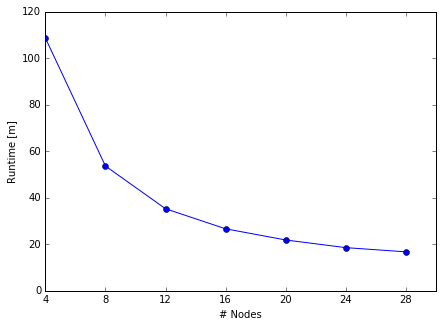

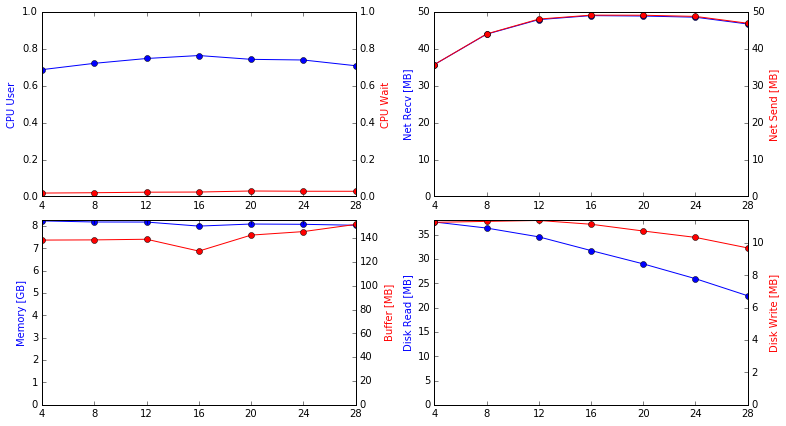

In [16]:
for dataset in ['tpchq10','kmeans','cc']: #['tpchq3','tpchq10', 'kmeans']: #['cc']:
    runtime_fig, stats_fig = plot_stats(data[dataset])
    runtime_fig.savefig('figures/%s_runtime.pdf' % dataset)
    stats_fig.savefig('figures/%s_stats.pdf' % dataset)